Some explanation of terms at https://www.intensivregister.de/#/aktuelle-lage/zeitreihen

Useful plots
- time series of available intensive care beds etc: https://www.intensivregister.de/#/aktuelle-lage/zeitreihen
- age distribution of intensiv care patients: https://www.intensivregister.de/#/aktuelle-lage/altersstruktur

In [37]:
%config InlineBackend.figure_formats = ['svg']

import numpy as np

%load_ext autoreload
%autoreload 2

import pandas as pd
# pd.options.plotting.backend = "plotly"

import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


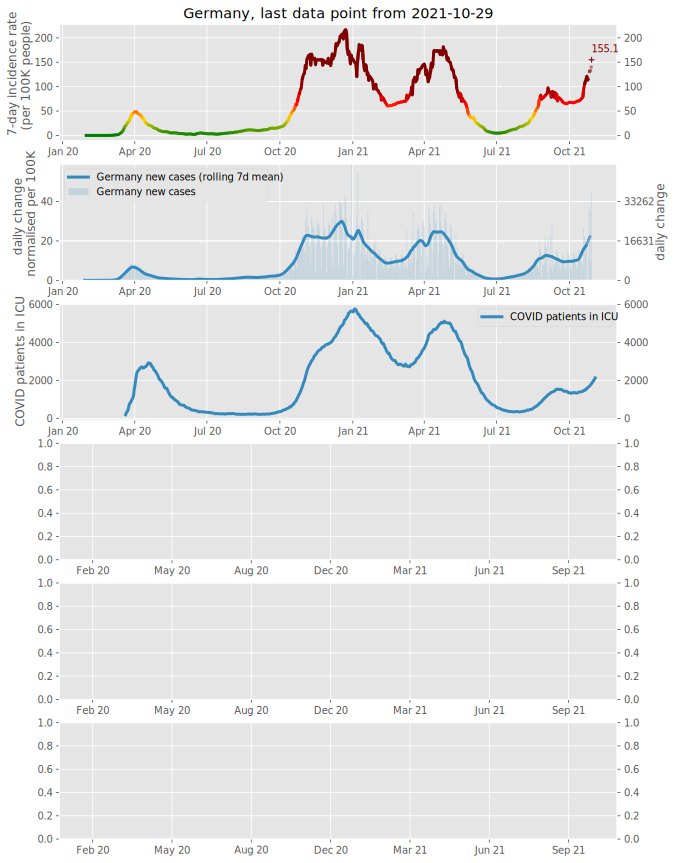

In [50]:
import oscovida as ov
ov.overview_divi();

In [3]:
def fetch_divi_data():

    def fix_index(data: pd.DataFrame):
        d2 = data.set_index(pd.to_datetime(data['Datum'], utc=True))
        d2.drop(labels=['Datum'], axis=1, inplace=True)
        return d2
        
    # for all of Germany, split according to Children and adults
    data = fix_index(pd.read_csv("https://diviexchange.blob.core.windows.net/%24web/zeitreihe-deutschland.csv"))

    # for adults only, split according to country
    data_by_country = fix_index(pd.read_csv("https://diviexchange.blob.core.windows.net/%24web/zeitreihe-bundeslaender.csv"))
    
    # Age distribution
    data_by_age = fix_index(pd.read_csv("https://diviexchange.blob.core.windows.net/%24web/bund-covid-altersstruktur-zeitreihe_ab-2021-04-29.csv"))
    
    return data, data_by_country, data_by_age
    

In [4]:
data, data_by_country, data_by_age = fetch_divi_data()

In [5]:
data.shape, data.columns

((1186, 14),
 Index(['Bundesland', 'Behandlungsgruppe', 'Anzahl_Meldebereiche',
        'Aktuelle_COVID_Faelle_ITS', 'Belegte_Intensivbetten',
        'Freie_Intensivbetten', '7_Tage_Notfallreserve',
        'Freie_IV_Kapazitaeten_Gesamt', 'Freie_IV_Kapazitaeten_Davon_COVID',
        'Betriebssituation_Regulaerer_Betrieb',
        'Betriebssituation_Teilweise_Eingeschraenkt',
        'Betriebssituation_Eingeschraenkt', 'Betriebssituation_Keine_Angabe',
        'faelle_covid_erstaufnahmen'],
       dtype='object'))

In [6]:
data.head()

,Bundesland,Behandlungsgruppe,Anzahl_Meldebereiche,Aktuelle_COVID_Faelle_ITS,Belegte_Intensivbetten,Freie_Intensivbetten,7_Tage_Notfallreserve,Freie_IV_Kapazitaeten_Gesamt,Freie_IV_Kapazitaeten_Davon_COVID,Betriebssituation_Regulaerer_Betrieb,Betriebssituation_Teilweise_Eingeschraenkt,Betriebssituation_Eingeschraenkt,Betriebssituation_Keine_Angabe,faelle_covid_erstaufnahmen
Datum,,,,,,,,,,,,,,
2020-03-20 11:15:00+00:00,DEUTSCHLAND,ERWACHSENE,308,200,576,2866,0,1842,0,245,42,17,4,NaN
2020-03-20 11:15:00+00:00,DEUTSCHLAND,KINDER,9,0,22,55,0,34,0,6,1,2,0,NaN
2020-03-21 11:15:00+00:00,DEUTSCHLAND,ERWACHSENE,402,308,2828,3554,0,2309,0,319,57,22,4,NaN
2020-03-21 11:15:00+00:00,DEUTSCHLAND,KINDER,15,0,43,73,0,44,0,10,2,3,0,NaN
2020-03-22 11:15:00+00:00,DEUTSCHLAND,ERWACHSENE,426,364,3255,3712,0,2403,0,335,58,26,7,NaN


In [7]:
# accumulate adults and children
data = data.groupby('Datum').sum()


<AxesSubplot:xlabel='Datum'>

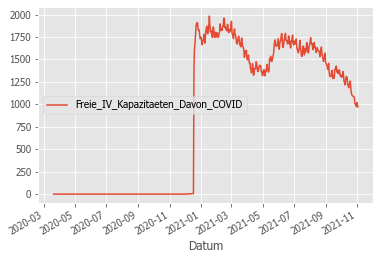

In [8]:
data.plot(y="Freie_IV_Kapazitaeten_Davon_COVID")

In [9]:
data["2020-12-15":]['Freie_IV_Kapazitaeten_Davon_COVID']

Datum
2020-12-15 11:15:00+00:00       6
2020-12-16 11:15:00+00:00       5
2020-12-17 11:15:00+00:00       5
2020-12-18 11:15:00+00:00    1386
2020-12-19 11:15:00+00:00    1623
                             ... 
2021-10-29 10:15:00+00:00    1000
2021-10-30 10:15:00+00:00     974
2021-10-31 11:15:00+00:00    1020
2021-11-01 11:15:00+00:00     985
2021-11-02 11:15:00+00:00     970
Name: Freie_IV_Kapazitaeten_Davon_COVID, Length: 323, dtype: int64

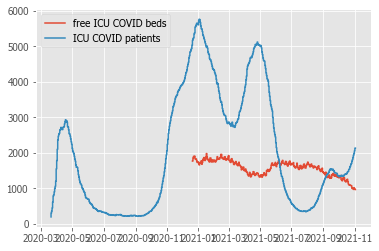

In [23]:
# combine children and adults per day
# data = data.groupby('Datum').sum()

# ax.plot(data.index, data['Aktuelle_COVID_Faelle_ITS'])
free_covid_icu_beds = data['Freie_IV_Kapazitaeten_Davon_COVID']
# only useful data from 20 December 2020
#free_covid_beds = free_covid_icu_beds["2020-12-20":]
free_covid_beds = free_covid_icu_beds.copy()
# only useful data from 20 December 2020
free_covid_beds[:"2020-12-20"] = np.nan
covid_patients = data['Aktuelle_COVID_Faelle_ITS']

fig, ax = plt.subplots()
ax.step(free_covid_beds.index, free_covid_beds, label='free ICU COVID beds')
ax.step(covid_patients.index, covid_patients.values, label='ICU COVID patients')
ax.legend()

In [33]:
data.tail()

,Anzahl_Meldebereiche,Aktuelle_COVID_Faelle_ITS,Belegte_Intensivbetten,Freie_Intensivbetten,7_Tage_Notfallreserve,Freie_IV_Kapazitaeten_Gesamt,Freie_IV_Kapazitaeten_Davon_COVID,Betriebssituation_Regulaerer_Betrieb,Betriebssituation_Teilweise_Eingeschraenkt,Betriebssituation_Eingeschraenkt,Betriebssituation_Keine_Angabe,faelle_covid_erstaufnahmen
Datum,,,,,,,,,,,,
2021-10-29 10:15:00+00:00,1659,1870,21487,3245,10809,2867,1000,580,314,564,201,143.0
2021-10-30 10:15:00+00:00,1660,1937,21148,3438,10841,2905,974,564,311,581,204,115.0
2021-10-31 11:15:00+00:00,1660,1985,20859,3659,10855,3018,1020,566,304,586,204,159.0
2021-11-01 11:15:00+00:00,1662,2059,21047,3665,10823,3029,985,575,312,573,202,182.0
2021-11-02 11:15:00+00:00,1664,2136,21512,3411,10795,2962,970,560,309,594,201,0.0


In [25]:
import sys

In [26]:
sys.version

'3.9.7 (default, Oct 22 2021, 16:44:39) \n[Clang 13.0.0 (clang-1300.0.29.3)]'

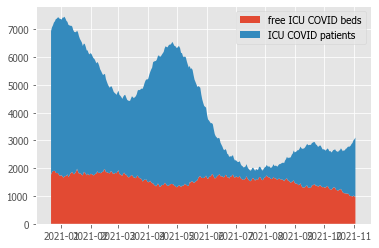

In [31]:
fig, ax = plt.subplots()
ax.stackplot(free_covid_beds.index, free_covid_beds, covid_patients,  
             labels=['free ICU COVID beds', 'ICU COVID patients'])
#ax.step(covid_patients.index, covid_patients.values, label='ICU COVID patients')
ax.legend()

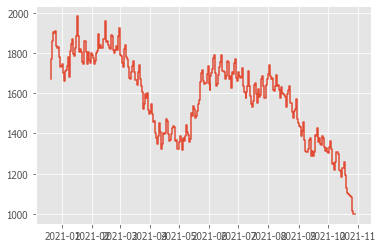

In [10]:
fig, ax = plt.subplots()
ax.step(pd.to_datetime(free_covid_beds.index), free_covid_beds.values)

# Betriebssituation (operation status)
Betriebssituation_Regulaerer_Betrieb	Betriebssituation_Teilweise_Eingeschraenkt	Betriebssituation_Eingeschraenkt	Betriebssituation_Keine_Angabe



In [34]:
regular = data['Betriebssituation_Regulaerer_Betrieb']
partly_reduced = data['Betriebssituation_Teilweise_Eingeschraenkt']
reduced = data['Betriebssituation_Keine_Angabe']
no_data = data['Betriebssituation_Keine_Angabe']

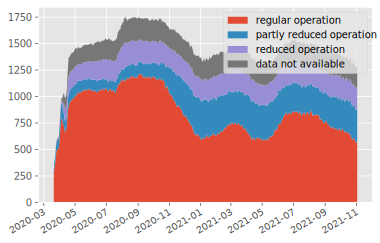

In [38]:
fig, ax = plt.subplots()
ax.stackplot(regular.index, regular, partly_reduced, reduced, no_data,
             labels=['regular operation', 'partly reduced operation', 'reduced operation', 'data not available'])
#ax.step(covid_patients.index, covid_patients.values, label='ICU COVID patients')
fig.autofmt_xdate()
ax.legend()

# ICU beds
'Bundesland', 'Behandlungsgruppe', 'Anzahl_Meldebereiche',
        'Aktuelle_COVID_Faelle_ITS', 'Belegte_Intensivbetten',
        'Freie_Intensivbetten', '7_Tage_Notfallreserve',
        'Freie_IV_Kapazitaeten_Gesamt', 'Freie_IV_Kapazitaeten_Davon_COVID',
        'Betriebssituation_Regulaerer_Betrieb',
        'Betriebssituation_Teilweise_Eingeschraenkt',
        'Betriebssituation_Eingeschraenkt', 'Betriebssituation_Keine_Angabe',
        'faelle_covid_erstaufnahmen'],



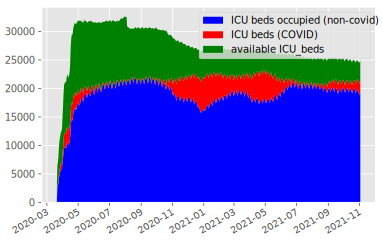

In [48]:
icu_beds_available = data['Freie_Intensivbetten']
icu_beds_occupied = data['Belegte_Intensivbetten']
icu_covid_cases = data['Aktuelle_COVID_Faelle_ITS']
icu_noncovid = icu_beds_occupied - icu_covid_cases 
fig, ax = plt.subplots()
pal = ["blue", "red", "green"]
ax.stackplot(icu_beds_available.index, icu_noncovid, icu_covid_cases, icu_beds_available,
             labels=['ICU beds occupied (non-covid)', 'ICU beds (COVID)', 'available ICU_beds'],
            colors=pal)

fig.autofmt_xdate()
ax.legend()

In [ ]:
ICU_beds_available = data['Freie_Intensivbetten']
ICU_beds_occupied = data['Belegte_Intensivbetten']

fig, ax = plt.subplots()
ax.stackplot(ICU_beds_available.index, ICU_beds_occupied, ICU_beds_available,
             labels=['ICU beds occupied', 'ICU beds free'])

fig.autofmt_xdate()
ax.legend()

In [49]:
ICU_beds_available.tail()

Datum
2021-10-29 10:15:00+00:00    3245
2021-10-30 10:15:00+00:00    3438
2021-10-31 11:15:00+00:00    3659
2021-11-01 11:15:00+00:00    3665
2021-11-02 11:15:00+00:00    3411
Name: Freie_Intensivbetten, dtype: int64

In [33]:
data['Aktuelle_COVID_Faelle_ITS'].tail()

Datum
2021-10-27 10:15:00+00:00       7
2021-10-28 10:15:00+00:00    1803
2021-10-28 10:15:00+00:00       8
2021-10-29 10:15:00+00:00       8
2021-10-29 10:15:00+00:00    1860
Name: Aktuelle_COVID_Faelle_ITS, dtype: int64

/Users/fangohr/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


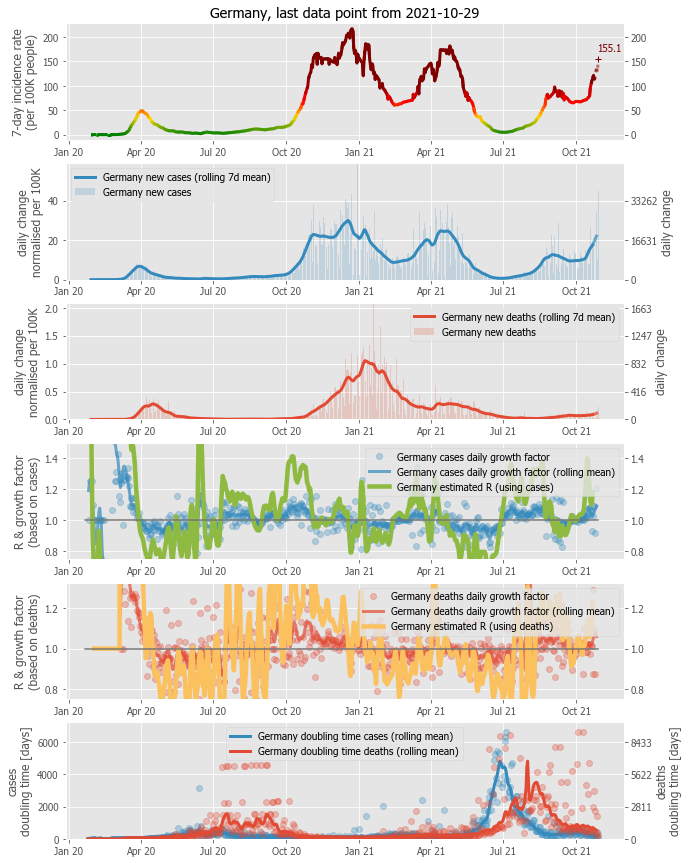

In [24]:
import oscovida as ov
ov.overview("Germany");

In [25]:
data_by_country.tail()

,Bundesland,Behandlungsgruppe,Anzahl_Meldebereiche,Aktuelle_COVID_Faelle_ITS,Belegte_Intensivbetten,Freie_Intensivbetten,7_Tage_Notfallreserve,Freie_IV_Kapazitaeten_Gesamt,Freie_IV_Kapazitaeten_Davon_COVID,Betriebssituation_Regulaerer_Betrieb,Betriebssituation_Teilweise_Eingeschraenkt,Betriebssituation_Eingeschraenkt,Betriebssituation_Keine_Angabe,faelle_covid_erstaufnahmen
Datum,,,,,,,,,,,,,,
2021-11-02 11:15:00+00:00,SACHSEN,ERWACHSENE,79,202,1166,166,714,171,44,24,15,29,11,NaN
2021-11-02 11:15:00+00:00,SACHSEN_ANHALT,ERWACHSENE,40,49,632,90,319,72,36,12,7,16,5,NaN
2021-11-02 11:15:00+00:00,THUERINGEN,ERWACHSENE,36,80,552,84,325,77,29,11,7,14,4,NaN
2021-11-02 11:15:00+00:00,BREMEN,ERWACHSENE,11,20,169,15,129,10,3,2,4,5,0,NaN
2021-11-02 11:15:00+00:00,BADEN_WUERTTEMBERG,ERWACHSENE,129,284,1949,324,1311,242,85,25,21,65,18,NaN


In [26]:
data_by_age.tail()

,Bundesland,Stratum_17_Minus,Stratum_18_Bis_29,Stratum_30_Bis_39,Stratum_40_Bis_49,Stratum_50_Bis_59,Stratum_60_Bis_69,Stratum_70_Bis_79,Stratum_80_Plus,Stratum_Unbekannt
Datum,,,,,,,,,,
2021-10-29 10:15:00+00:00,DEUTSCHLAND,9,34,106,190,383,465,353,262,70
2021-10-30 10:15:00+00:00,DEUTSCHLAND,10,35,116,187,387,465,362,275,100
2021-10-31 11:15:00+00:00,DEUTSCHLAND,8,36,115,190,396,483,374,285,98
2021-11-01 11:15:00+00:00,DEUTSCHLAND,7,36,111,190,403,497,394,302,119
2021-11-02 11:15:00+00:00,DEUTSCHLAND,5,38,121,206,423,517,429,281,116


In [27]:
da.shape

NameError: name 'da' is not defined

In [ ]:
db.shape

In [30]:
data, data_by_country, data_by_age = fetch_divi_data()


In [32]:
data.head()

,Bundesland,Behandlungsgruppe,Anzahl_Meldebereiche,Aktuelle_COVID_Faelle_ITS,Belegte_Intensivbetten,Freie_Intensivbetten,7_Tage_Notfallreserve,Freie_IV_Kapazitaeten_Gesamt,Freie_IV_Kapazitaeten_Davon_COVID,Betriebssituation_Regulaerer_Betrieb,Betriebssituation_Teilweise_Eingeschraenkt,Betriebssituation_Eingeschraenkt,Betriebssituation_Keine_Angabe,faelle_covid_erstaufnahmen
Datum,,,,,,,,,,,,,,
2020-03-20 11:15:00+00:00,DEUTSCHLAND,ERWACHSENE,308,200,576,2866,0,1842,0,245,42,17,4,NaN
2020-03-20 11:15:00+00:00,DEUTSCHLAND,KINDER,9,0,22,55,0,34,0,6,1,2,0,NaN
2020-03-21 11:15:00+00:00,DEUTSCHLAND,ERWACHSENE,402,308,2828,3554,0,2309,0,319,57,22,4,NaN
2020-03-21 11:15:00+00:00,DEUTSCHLAND,KINDER,15,0,43,73,0,44,0,10,2,3,0,NaN
2020-03-22 11:15:00+00:00,DEUTSCHLAND,ERWACHSENE,426,364,3255,3712,0,2403,0,335,58,26,7,NaN


In [33]:
d2=data

In [34]:
adults = d2[d2['Behandlungsgruppe']=='ERWACHSENE']

In [35]:
adults.columns

Index(['Bundesland', 'Behandlungsgruppe', 'Anzahl_Meldebereiche',
       'Aktuelle_COVID_Faelle_ITS', 'Belegte_Intensivbetten',
       'Freie_Intensivbetten', '7_Tage_Notfallreserve',
       'Freie_IV_Kapazitaeten_Gesamt', 'Freie_IV_Kapazitaeten_Davon_COVID',
       'Betriebssituation_Regulaerer_Betrieb',
       'Betriebssituation_Teilweise_Eingeschraenkt',
       'Betriebssituation_Eingeschraenkt', 'Betriebssituation_Keine_Angabe',
       'faelle_covid_erstaufnahmen'],
      dtype='object')

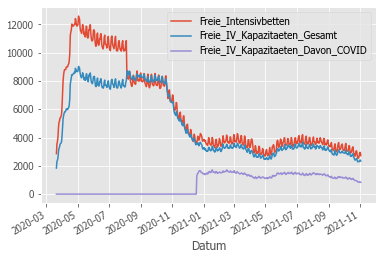

In [36]:
adults.plot(y=['Freie_Intensivbetten', 'Freie_IV_Kapazitaeten_Gesamt', 'Freie_IV_Kapazitaeten_Davon_COVID'])

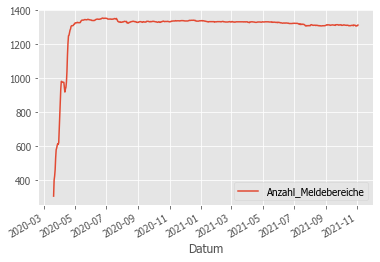

In [37]:
adults.plot(y="Anzahl_Meldebereiche")

In [ ]:
adults.plot(y=['Aktuelle_COVID_Faelle_ITS', 'Belegte_Intensivbetten'])

In [20]:
toplot = adults
toplot = toplot.drop(['Bundesland'], axis=1)

NameError: name 'adults' is not defined

In [19]:
import matplotlib.pyplot as plt
pd.options.plotting.backend = "matplotlib"
n = len(toplot.columns)
fig, axes = plt.subplots(n,1, figsize=(6, n*2))

for i, col in enumerate(toplot.columns):
    print(f"Working on {col} shape={toplot[col].shape}")
    ax = axes[i]
    toplot.plot(y=[col], ax=ax)
    


NameError: name 'toplot' is not defined

In [18]:
toplot.plot(y=['Behandlungsgruppe'])

NameError: name 'toplot' is not defined

In [ ]:
adults.tail()

In [ ]:
import oscovida as ov

In [ ]:
!pwd